In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

data = pd.read_csv(r"C:\Users\sorin.creanga\Desktop\Visualisations\urbanisation_csv.csv", index_col=0)
data.columns


Index(['CountryName', 'IndepYear', 'CountryPopulation', 'GNP', 'GNPOld',
       'gnp_per_capita', 'gnp_delta', 'CapitalName', 'CapitalPopulation',
       'urbanization_rate', 'target_high_life'],
      dtype='object')

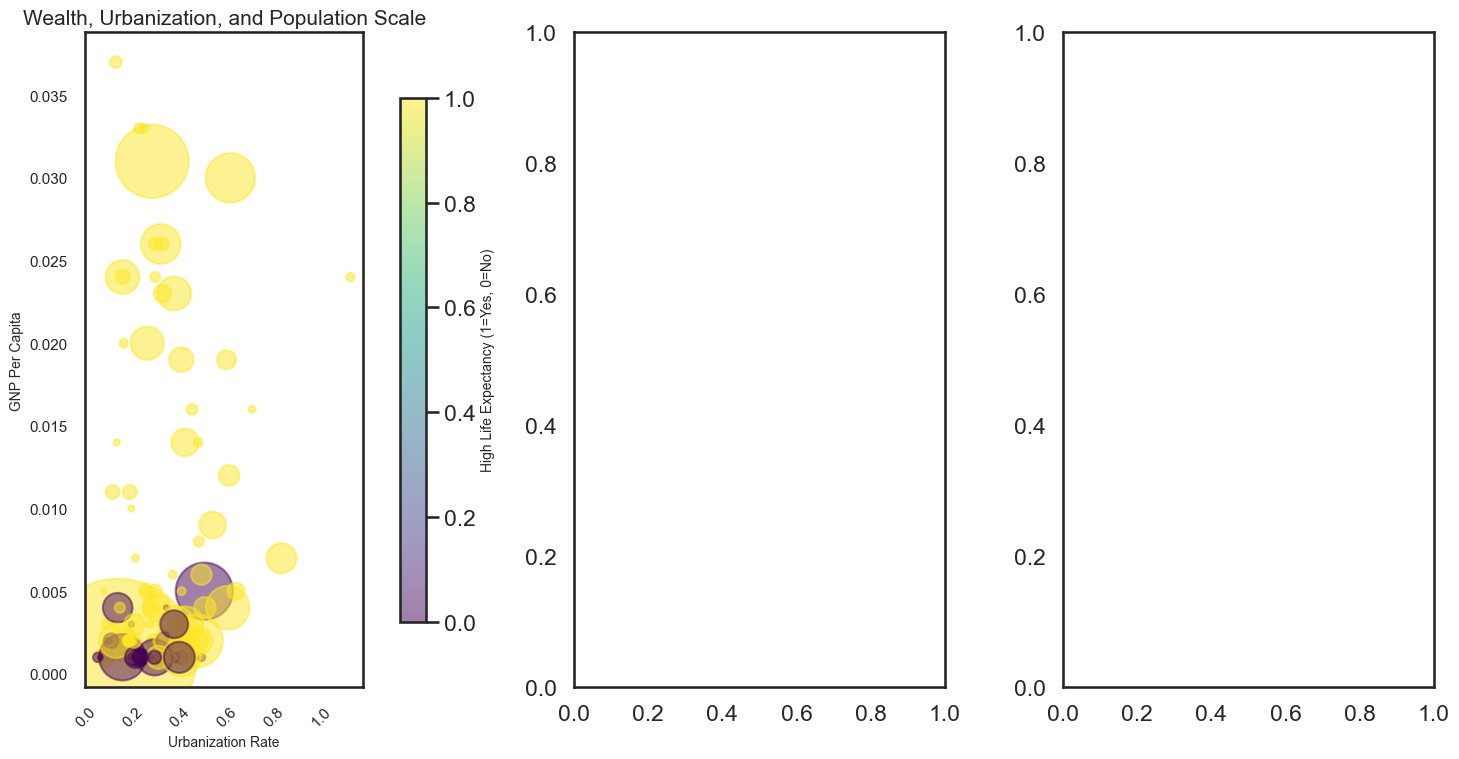

In [187]:
var1, var2 = data["GNP"].to_list(), data["CountryPopulation"].to_list()

fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sc = axes[0].scatter(
    data['urbanization_rate'], 
    data['gnp_per_capita'], 
    s=data['CountryPopulation']/100000,
    c=data['target_high_life'], 
    alpha=0.5, 
    cmap='viridis'
)

# Store colorbar, then customize it
cbar = fig.colorbar(sc, ax=axes[0], shrink=0.8, pad=0.1)
cbar.set_label('High Life Expectancy (1=Yes, 0=No)', fontsize=10)

# Fix axis labels (not set_label!)
axes[0].set_xlabel('Urbanization Rate',fontsize=10)
axes[0].set_ylabel('GNP Per Capita',fontsize=10)
axes[0].set_title('Wealth, Urbanization, and Population Scale', fontsize=15)
axes[0].tick_params(axis='both', labelsize=11)
axes[0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The Correlation Matrix is the core identifire for the metrics to perform logistic regresion to find how country economic and population data can predict a high life expectancy. 

From the Matrix these are the core metrics:
 - GNP Per Capita
 - Urbanization Rate
 - Capital Population

<Axes: >

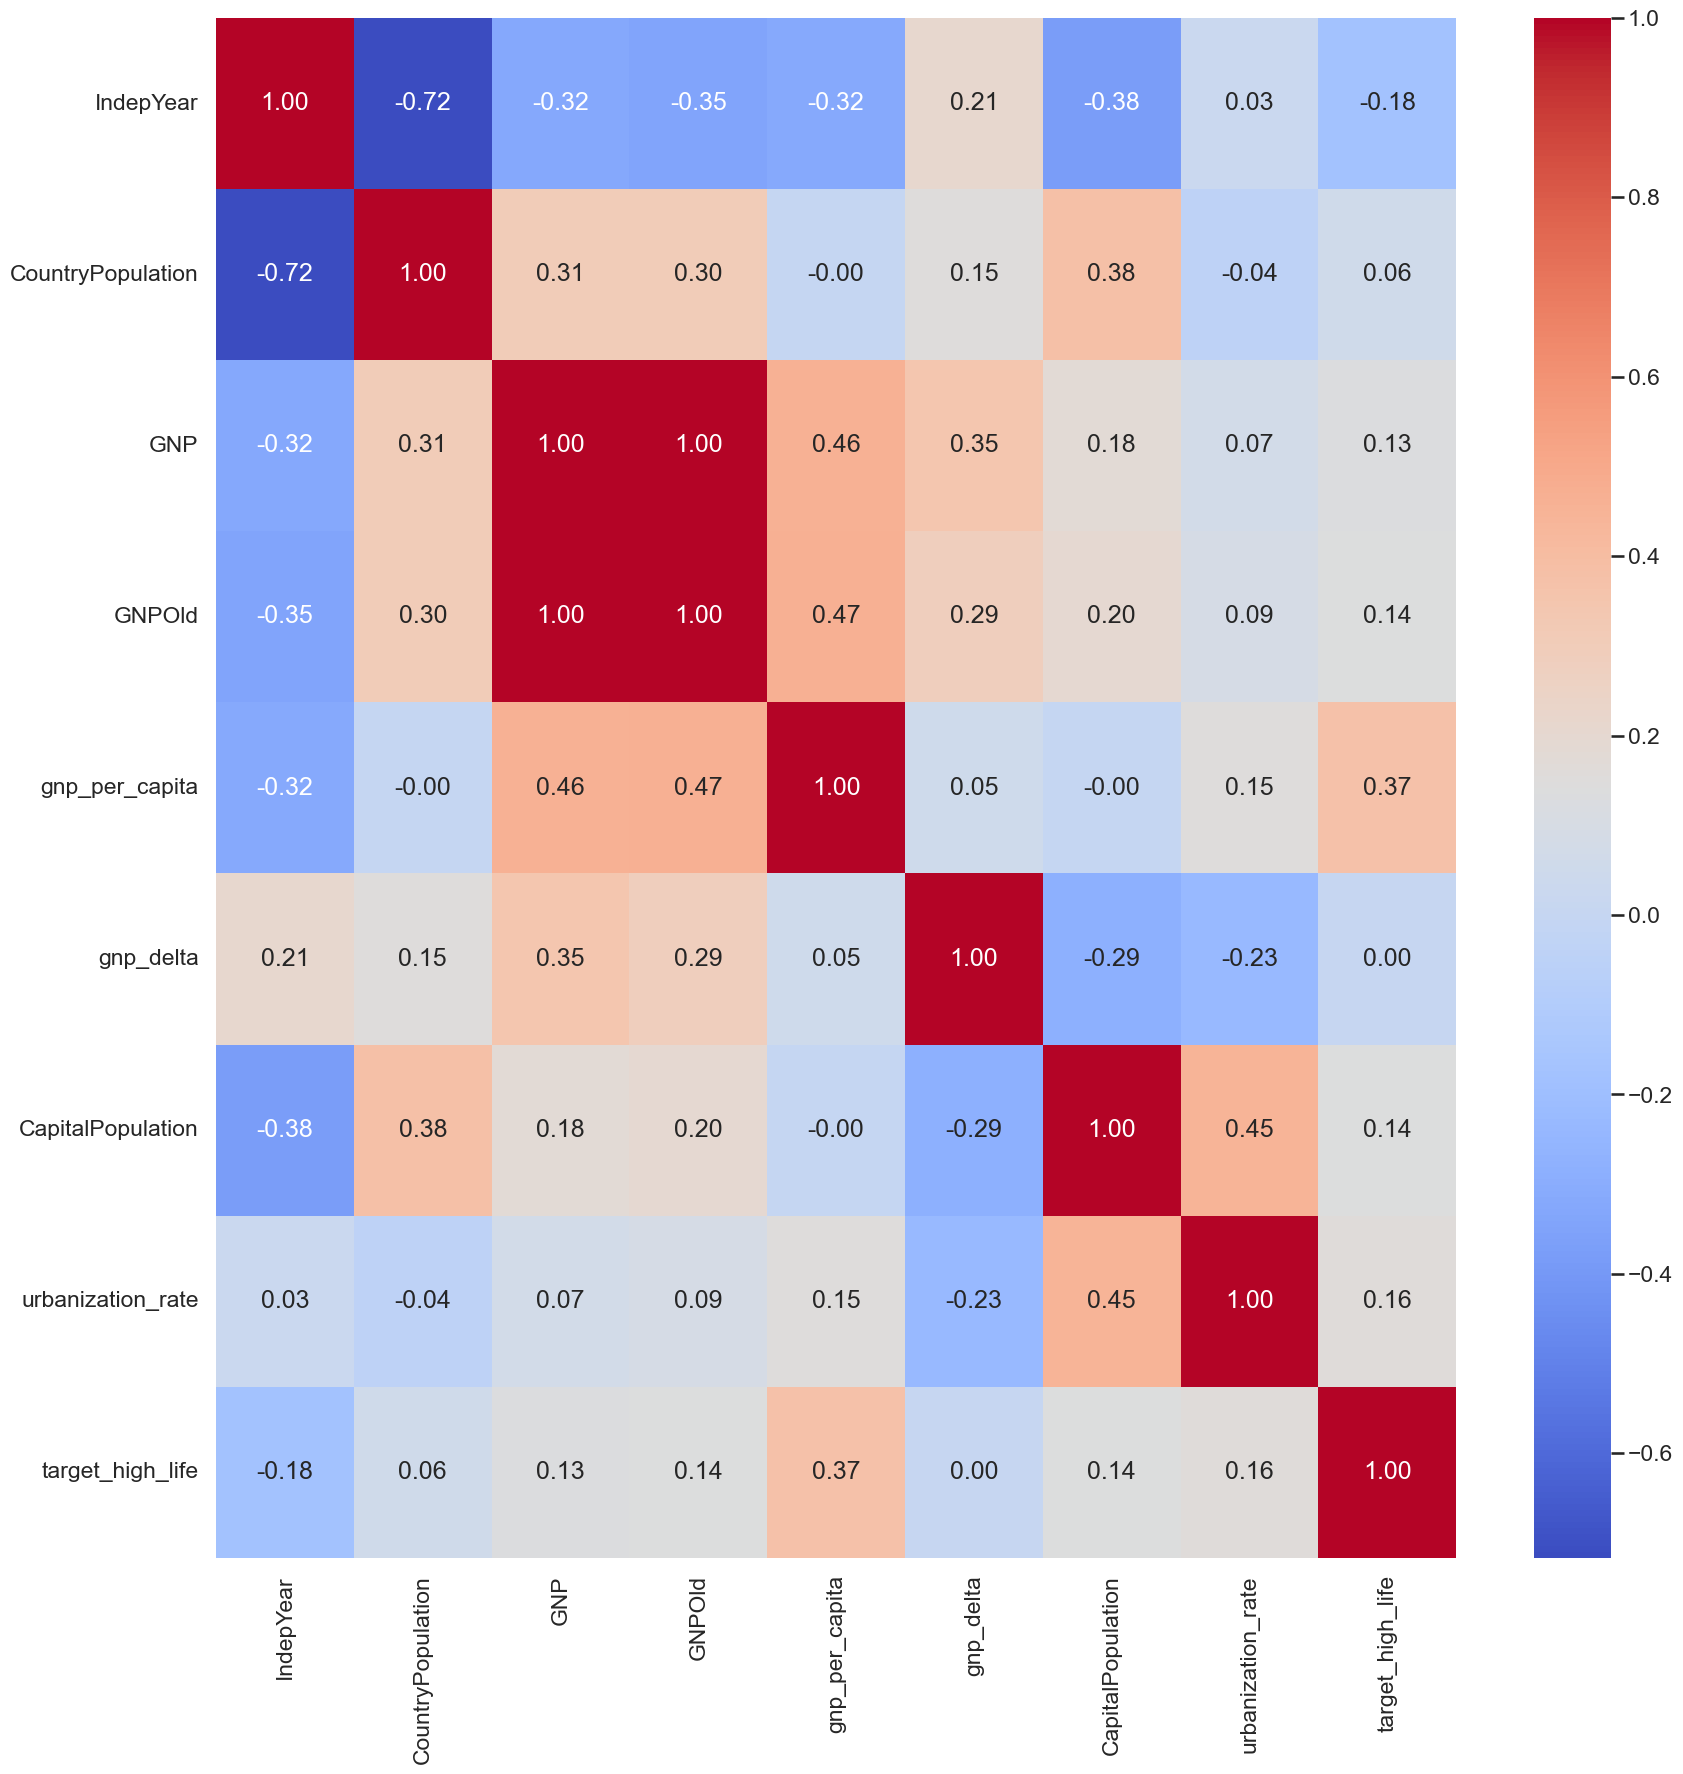

In [178]:
plt.figure (figsize=(20,20))
# Correlation matrix
cols = data.columns.to_list()
cols.pop(0) # string data
cols.pop(-4) # string data

corr = data[cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [67]:
# This finds the "impossible" countries where urbanization is > 100%
outliers = data[data['urbanization_rate'] > 1]
print(outliers[['CountryName', 'urbanization_rate']])

     CountryName  urbanization_rate
code                               
SGP    Singapore             1.1264


Working with the second SQL Query which brings a CSV file **with Null** values. The visualisations will be executed using the Seaborn package.

In [68]:
import seaborn as sns

In [69]:
life_data = pd.read_csv(r"C:\Users\sorin.creanga\Desktop\Visualisations\luanguage_diversity_csv.csv", index_col=0)
life_data.columns

Index(['Continent', 'TotalLanguagesSpoken', 'PrimaryOfficialLanguage',
       'AvgLanguageSpread'],
      dtype='object')

In [88]:
life_data = life_data.dropna(subset=["PrimaryOfficialLanguage"])
continent = life_data["Continent"].tolist()
total_languages = life_data["TotalLanguagesSpoken"].tolist()
official_languages = life_data["PrimaryOfficialLanguage"].tolist()
average_lenguage_spread = life_data["AvgLanguageSpread"].tolist()
continent


['North America',
 'Asia',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'Asia',
 'South America',
 'Asia',
 'Oceania',
 'North America',
 'Oceania',
 'Europe',
 'Asia',
 'Africa',
 'Europe',
 'Asia',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'South America',
 'South America',
 'North America',
 'Asia',
 'Asia',
 'North America',
 'Oceania',
 'Europe',
 'South America',
 'Asia',
 'Oceania',
 'South America',
 'Africa',
 'Africa',
 'North America',
 'North America',
 'Oceania',
 'North America',
 'Asia',
 'Europe',
 'Europe',
 'Africa',
 'Europe',
 'North America',
 'Africa',
 'South America',
 'Africa',
 'Africa',
 'Africa',
 'Europe',
 'Europe',
 'Europe',
 'Oceania',
 'South America',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'North America',
 'Africa',
 'Europe',
 'North America',
 'North America',
 'Oceania',
 'Asia',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'Asia',
 'Asia',
 'Europe',
 'Asia',
 'Asia',

In [118]:
sns.set_style("white")
sns.set_context("talk")

<Axes: ylabel='Count'>

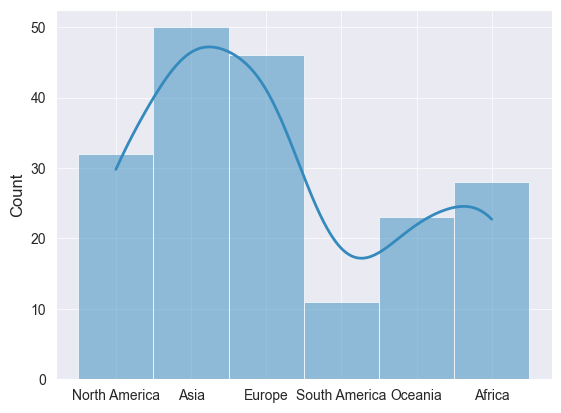

In [ ]:
sns.histplot(continent, legend="True",kde=True)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'Africa')])

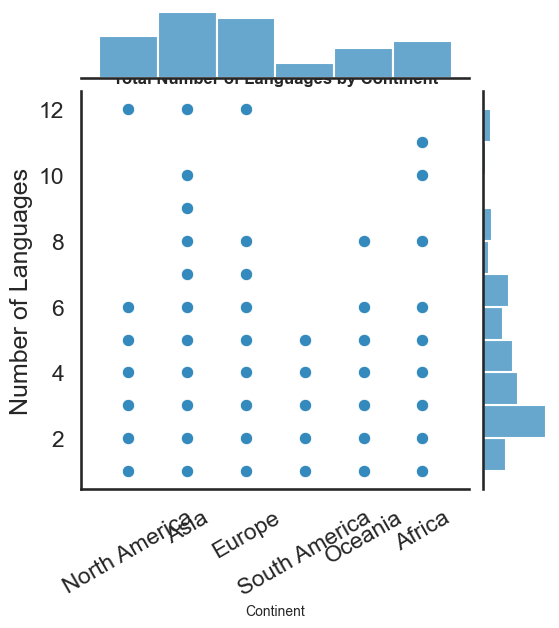

In [166]:
ax = sns.jointplot(x="Continent", y="TotalLanguagesSpoken", data=life_data, palette="flare")
plt.xlabel("Continent", fontsize=10)
plt.ylabel("Number of Languages")
plt.title("Total Number of Languages by Continent", fontweight = "bold", fontsize=12)
plt.xticks(rotation=30)





In [ ]:
top_5 = life_data.nsmallest(50, "TotalLanguagesSpoken")


we = sns.heatmap(
    x="TotalLanguagesSpoken",
    y="AvgLanguageSpread",
    data=top_5,
    palette="viridis", kind="hex"
)
we

In [164]:
cols = life_data.columns.to_list()

corr = life_data[cols].corr()
t = sns.heatmap(corr, annot=True, cmap="coolwarm")
t

ValueError: could not convert string to float: 'North America'